### Preprocessing

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd

# import data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# set plot figure size to 15 x 12
plt.rcParams["figure.figsize"] = (15, 12)

In [2]:
# read Auto dataset
file_name = "../../Data/Auto.csv"
Auto = pd.read_csv(file_name)

In [20]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    int64  
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.0+ KB


In [5]:
# verify missing values
Auto.isnull().sum().sum()

0

In [6]:
# plt.xkcd()
# plt.figure(figsize=(25, 10))
# sns.heatmap(Auto[['horsepower']]=='?', yticklabels=False, xticklabels=False, cmap='viridis')
# plt.title("missing values in Auto['horsepower']", fontsize=30, color='m')

In [7]:
Auto.shape

(397, 9)

In [8]:
# Pearson correlation
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.777416,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.843075,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.896921,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.777416,0.843075,0.896921,1.000000,0.863422,-0.686353,-0.418909,-0.453047
weight,-0.831739,0.897017,0.933104,0.863422,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.686353,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.418909,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.453047,-0.581265,0.210084,0.184314,1.000000


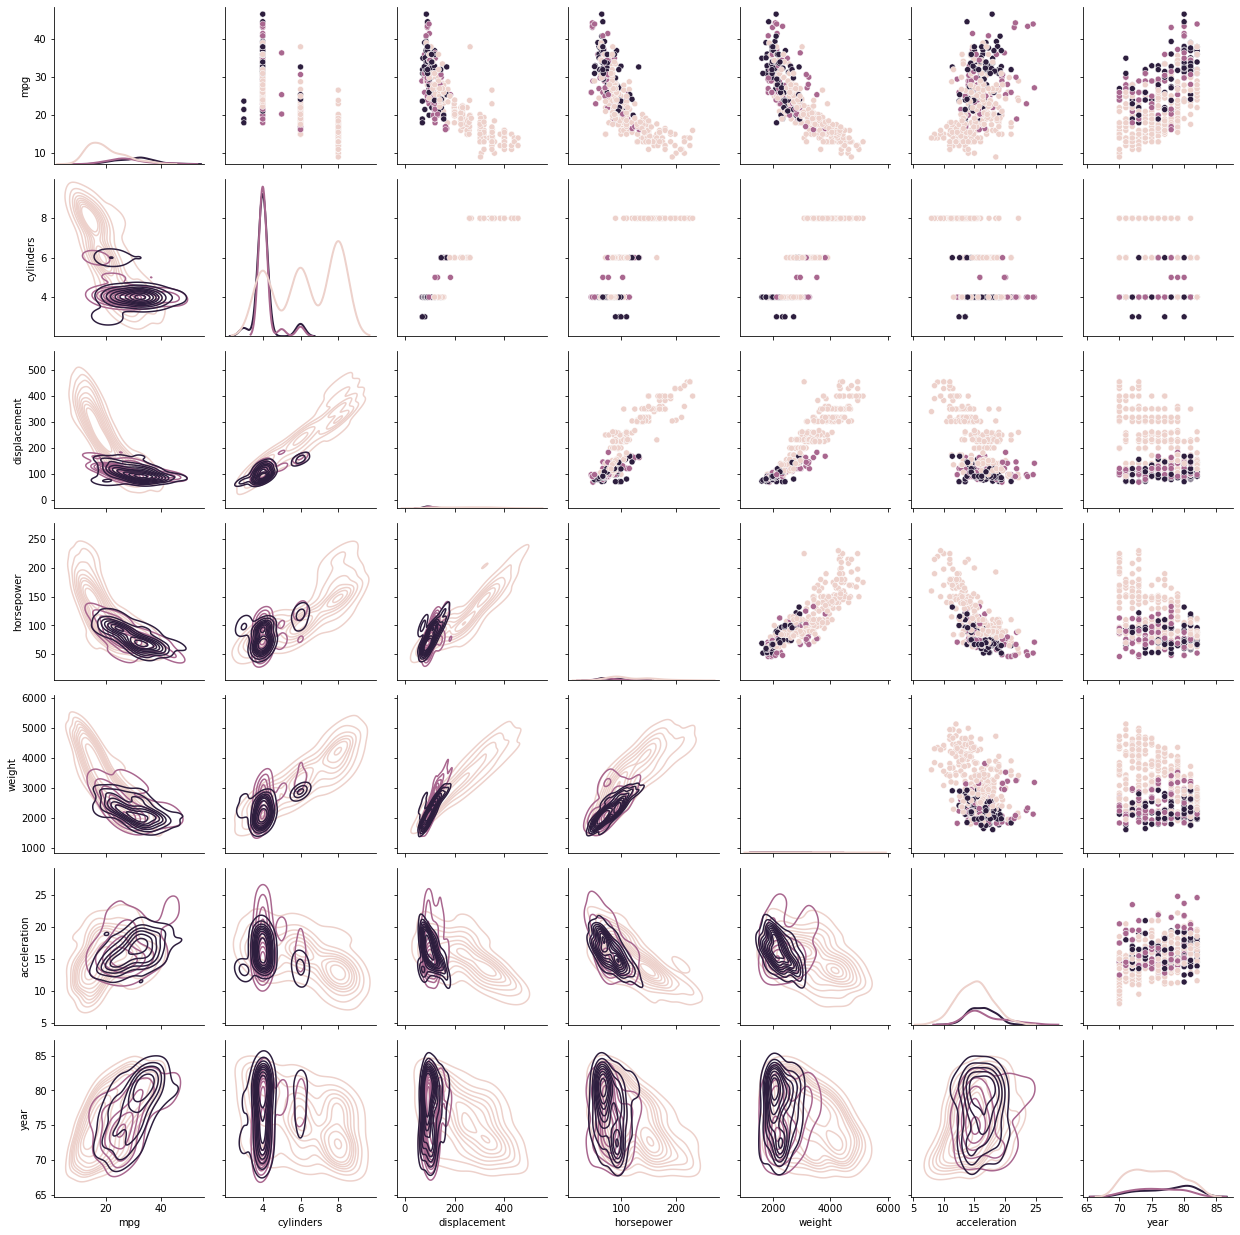

In [25]:
g = sns.PairGrid(data = Auto, hue = 'origin')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw = 2, legend = False)
g.map_lower(sns.kdeplot, cmap = 'Blue_d')
plt.show()

**From the pairplots, it appears that displacement, horsepower and weight have non-linear relationships with mpg.**

**Polynomial**

In [26]:
from sklearn.model_selection import KFold as KF, cross_val_score as CVS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.feature_selection import f_classif

*Checking for non-linear relationship between mpg and displacement*

In [27]:
X = Auto[['displacement']]
y = Auto.mpg
df = pd.DataFrame()
MSEdf = pd.DataFrame()
SCORE = []

for k in range(0,20):
    X_k = X**k
    df = pd.concat([df, X_k], axis=1)
    df_a = np.array(df)
    lmk = LinearRegression().fit(df_a, y)
    err = pd.DataFrame([mean_squared_error(y, lmk.predict(df_a))])
    MSEdf = MSEdf.append(err)
    SCORE.append(lmk.score(df_a, y))
    
MSEdf.columns = ['MSE']
MSEdf.reset_index(drop=True, inplace=True)

SCOREdf = pd.DataFrame(SCORE)
SCOREdf.columns = ['R^2']
SCOREdf.reset_index(drop=True, inplace=True)

Text(0, 0.5, 'MSE')

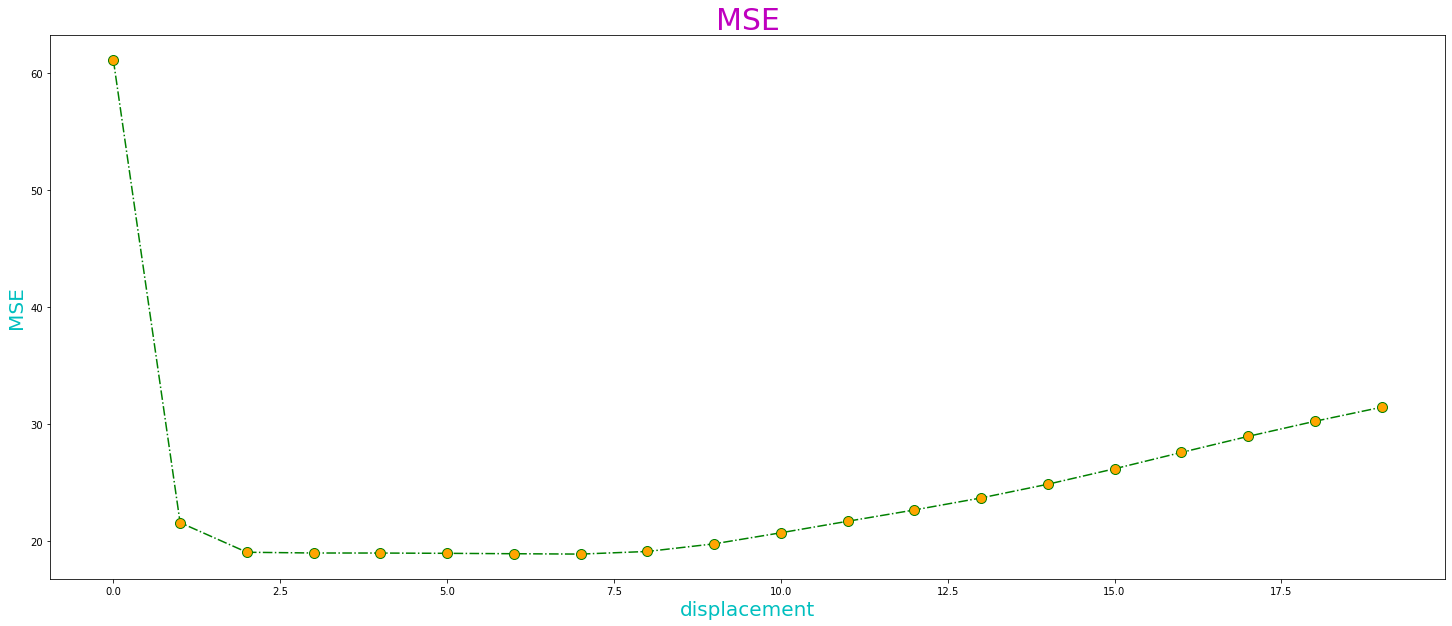

In [28]:
# plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("MSE", fontsize=30, color='m')
plt.xlabel("displacement", fontsize=20, color='c')
plt.ylabel("MSE", fontsize=20, color='c')

Text(0, 0.5, 'R^2')

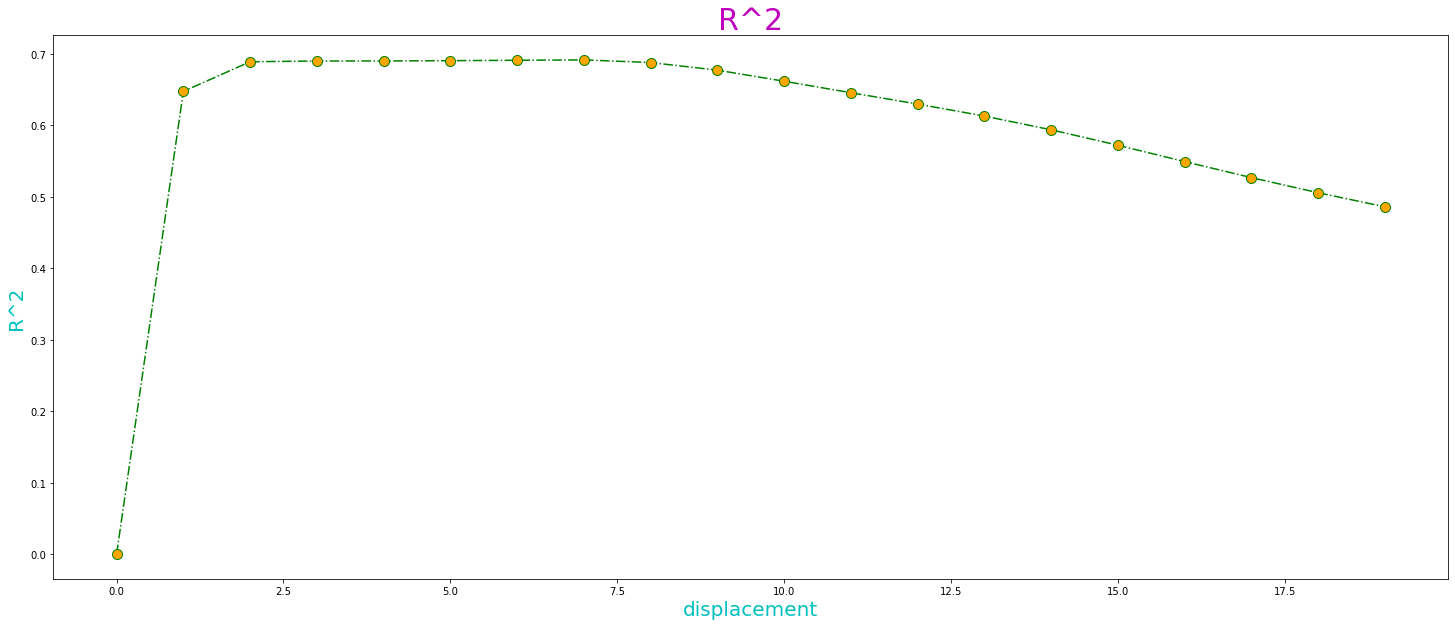

In [29]:
# plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(SCOREdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("R^2", fontsize=30, color='m')
plt.xlabel("displacement", fontsize=20, color='c')
plt.ylabel("R^2", fontsize=20, color='c')

*Checking for non-linear relationship between mpg and horsepower*

In [41]:
X = Auto[['horsepower']]
y = Auto.mpg
df = pd.DataFrame()
MSEdf = pd.DataFrame()
SCORE = []

for k in range(0, 40):
    X_k = X**k
    df = pd.concat([df, X_k], axis=1)
    df_a = np.array(df)
    lmk = LinearRegression().fit(df_a, y)
    err = pd.DataFrame([mean_squared_error(y, lmk.predict(df_a))])
    MSEdf = MSEdf.append(err)
    SCORE.append(lmk.score(df_a, y))
    
MSEdf.columns = ['MSE']
MSEdf.reset_index(drop=True, inplace=True)

SCOREdf = pd.DataFrame(SCORE)
SCOREdf.columns = ['R^2']
SCOREdf.reset_index(drop=True, inplace=True)

MSEdf

,MSE
0,61.088942
1,24.168280
2,19.177179
3,19.136244
4,19.063568
5,18.603250
6,18.409717
7,18.586115
8,18.749845
9,18.702457


In [42]:
# minimum MSEdf
MSEdf.min()

MSE    15.916984
dtype: float64

Text(0, 0.5, 'MSE')

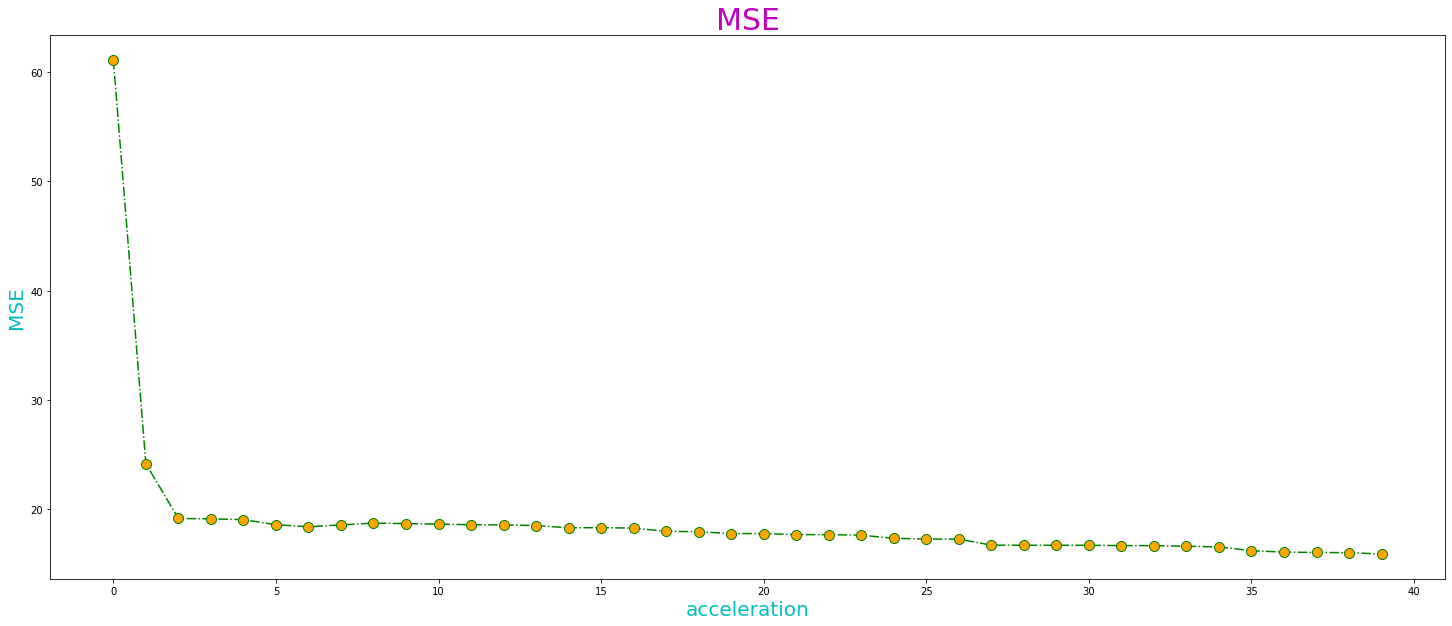

In [43]:
# plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("MSE", fontsize=30, color='m')
plt.xlabel("acceleration", fontsize=20, color='c')
plt.ylabel("MSE", fontsize=20, color='c')

Text(0, 0.5, 'R^2')

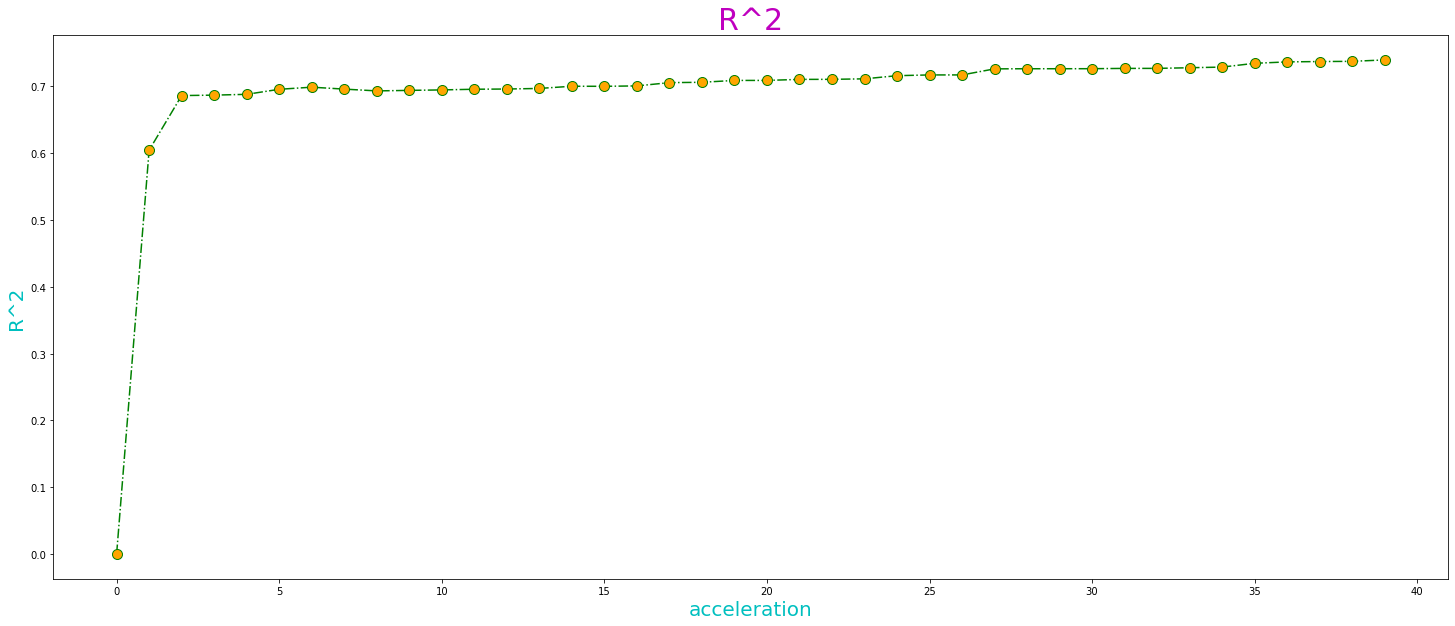

In [44]:
# plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(SCOREdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("R^2", fontsize=30, color='m')
plt.xlabel("acceleration", fontsize=20, color='c')
plt.ylabel("R^2", fontsize=20, color='c')

*Checking for non-linear relationship between mpg and weight*

In [34]:
X = Auto[['weight']]
y = Auto.mpg
df = pd.DataFrame()
MSEdf = pd.DataFrame()
SCORE = []

for k in range(0,25):
    X_k = X**k
    df = pd.concat([df, X_k], axis=1)
    df_a = np.array(df)
    lmk = LinearRegression().fit(df_a, y)
    err = pd.DataFrame([mean_squared_error(y, lmk.predict(df_a))])
    MSEdf = MSEdf.append(err)
    SCORE.append(lmk.score(df_a, y))
    
MSEdf.columns = ['MSE']
MSEdf.reset_index(drop=True, inplace=True)

SCOREdf = pd.DataFrame(SCORE)
SCOREdf.columns = ['R^2']
SCOREdf.reset_index(drop=True, inplace=True)

MSEdf

,MSE
0,61.088942
1,18.828246
2,17.419516
3,17.419499
4,17.403620
5,17.405618
6,17.343234
7,17.343132
8,17.298421
9,17.284711


In [35]:
# minimum MSEdf
MSEdf.min()

MSE    16.708128
dtype: float64

Text(0, 0.5, 'MSE')

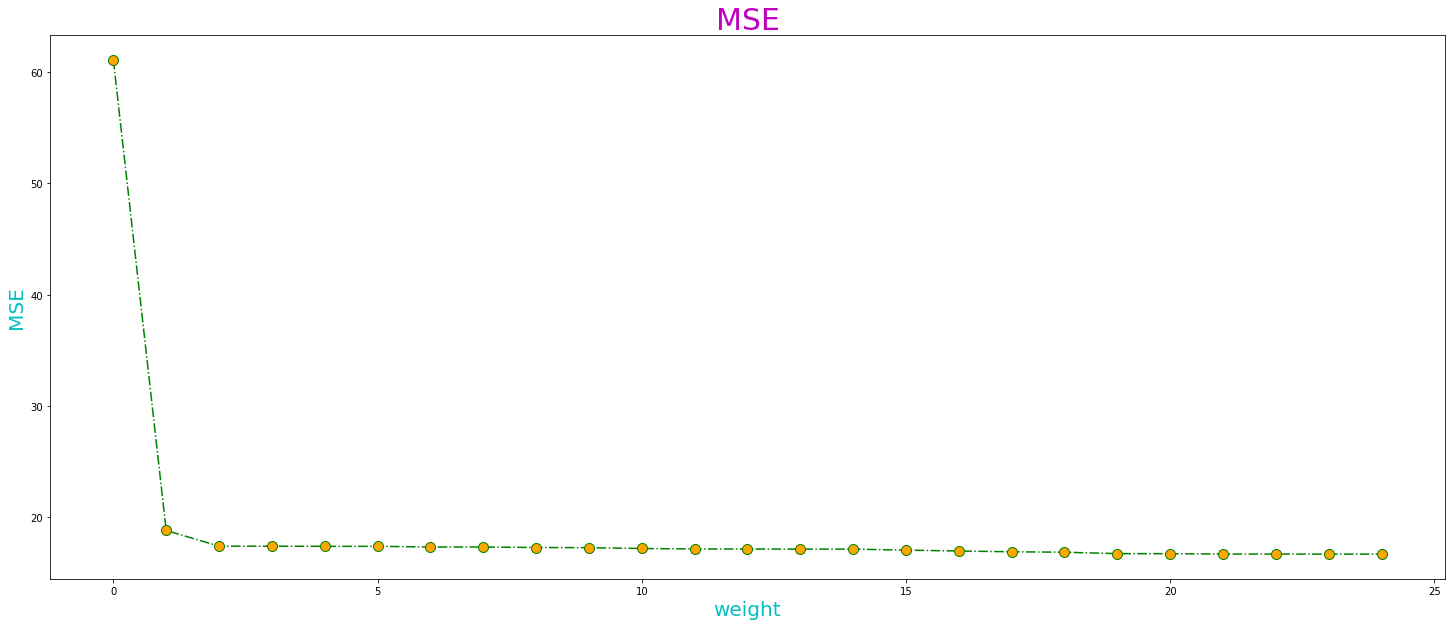

In [36]:
# plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("MSE", fontsize=30, color='m')
plt.xlabel("weight", fontsize=20, color='c')
plt.ylabel("MSE", fontsize=20, color='c')

Text(0, 0.5, 'R^2')

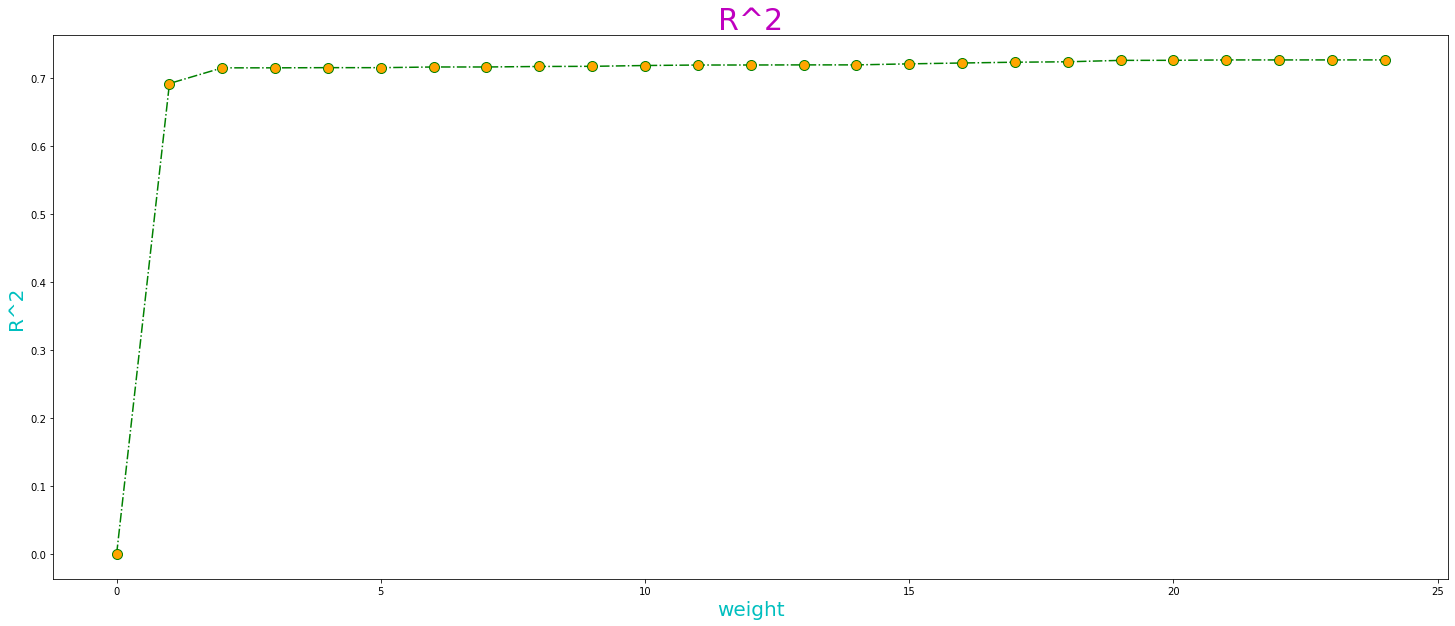

In [37]:
# plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(SCOREdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("R^2", fontsize=30, color='m')
plt.xlabel("weight", fontsize=20, color='c')
plt.ylabel("R^2", fontsize=20, color='c')

**In all these variables, I notice there is some form of non-linear relationship. However, the order at which they give the best fit is quite high. However, one needs to keep in mind that these scores are not cross-validated, which makes them extremely susceptible to variance. Therefore, their non-linear relationhip with 'mpg' cannot be argued against.**